In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
import urllib
from bs4 import BeautifulSoup
import requests

In [176]:
url = "https://www.datacamp.com/community/tutorials"
page = requests.get(url)
#html = urlopen(url)

page=urllib.request.Request(url,headers={'User-Agent': 'Mozilla/5.0'}) 
infile=urllib.request.urlopen(page).read()
data = infile.decode('ISO-8859-1') # Read the content as string decoded with ISO-8859-1

#print(data)


soup = BeautifulSoup(data, 'html.parser')

pages = [i.text for i in soup.find_all('a') if 'community/tutorials?page=' in str(i)]
lastpage = pages[-1]

In [177]:
print(lastpage)

29


In [178]:
description=[]
upvote=[]
author=[]
publishdate=[]
title=[]

In [179]:
for cp in np.arange(1,int(lastpage)+1):
    url = "https://www.datacamp.com/community/tutorials?page=" + str(cp)
    #html = urlopen(url)
    
    page=urllib.request.Request(url,headers={'User-Agent': 'Mozilla/5.0'}) 
    infile=urllib.request.urlopen(page).read()
    data = infile.decode('ISO-8859-1') # Read the content as string decoded with ISO-8859-1
    soup = BeautifulSoup(data, 'html')
    description.append([i.text for i in soup.find_all(class_='jsx-2625178925 blocText description')])
    upvote.append([i.text for i in soup.find_all(class_='jsx-1727309017 voted')])
    author.append([i.text for i in soup.find_all(class_='jsx-886169423 name')])
    publishdate.append([i.text for i in soup.find_all(class_='jsx-886169423 date')])
    title.append([i.text for i in soup.find_all(class_='jsx-2625178925 blue')])
print ("Done!")

Done!


In [180]:
descriptionflat = [y for x in description for y in x]
upvoteflat = [y for x in upvote for y in x]
authorflat = [y for x in author for y in x]
publishdateflat = [y for x in publishdate for y in x]
titleflat = [y for x in title for y in x]
publishdateformatted = [datetime.strptime(re.sub('rd, ', ', ', re.sub('st, ', ', ', re.sub('nd, ', ', ', re.sub('th, ',', ',a)))), "%B %d, %Y") for a in publishdateflat]

In [181]:
print(len(descriptionflat), len(upvoteflat), len(authorflat),len(publishdateflat),len(titleflat))

429 429 429 429 429


In [182]:
cdata = {"author":authorflat,"publishdate":publishdateformatted,"title":titleflat,"description":descriptionflat,"upvote":upvoteflat}
df = pd.DataFrame(data = cdata)
df.to_csv("c:\\users\\Turabi Traders\\documents\\datacamp130818.csv", header=True, index=False)

In [183]:
datacamp = pd.read_csv("c:\\users\\Turabi Traders\\documents\\datacamp130818.csv", parse_dates=["publishdate"], infer_datetime_format=True)

In [184]:
datacamp.shape

(429, 5)

In [185]:
datacamp.head()

,author,publishdate,title,description,upvote
0,DataCamp Team,2020-10-23,Installing Jupyter Notebook,,44
1,DataCamp Team,2020-10-23,Joins in SQL,,19
2,DataCamp Team,2020-10-23,What is SQL?,,20
3,DataCamp Team,2020-10-23,PCH in R,,2
4,DataCamp Team,2020-10-23,Python String format(),,12


In [186]:
datacamp.tail()

,author,publishdate,title,description,upvote
424,Karlijn Willems,2014-06-09,Decimal Comma or Point? A googleVis visualization,Decimal comma or decimal point? A handy tool t...,3
425,Karlijn Willems,2014-06-03,What Is the Best Statistical Programming Langu...,The infograph 'Statistical Language Wars' comp...,6
426,Karlijn Willems,2014-03-31,Data Science Cartoons: a Top Seven List by Dat...,The 7 funniest data science cartoons on the we...,10
427,Karlijn Willems,2014-03-17,R posts on Stack Overflow | A Top 5 selection ...,Stack Overflow is a useful resource for techni...,4
428,Karlijn Willems,2013-12-04,Coursera Courses on R: Complete List Ranked by...,A list of all Coursera courses on R. These cou...,7


In [187]:
datacamp['publishyymm'] = datacamp['publishdate'].dt.strftime("%Y-%b")
datacamp["posts"] = 1

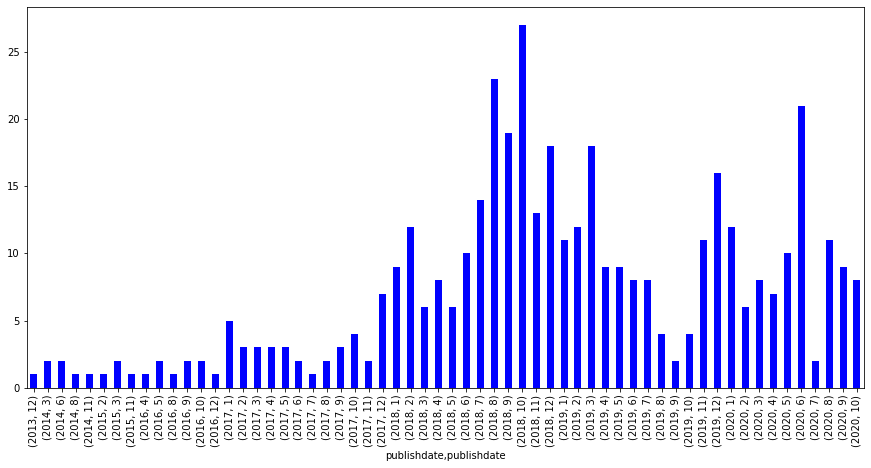

In [188]:
datacamp.groupby([datacamp['publishdate'].dt.year, datacamp['publishdate'].dt.month]).size().plot(kind='bar', figsize=(15,7), color='b')

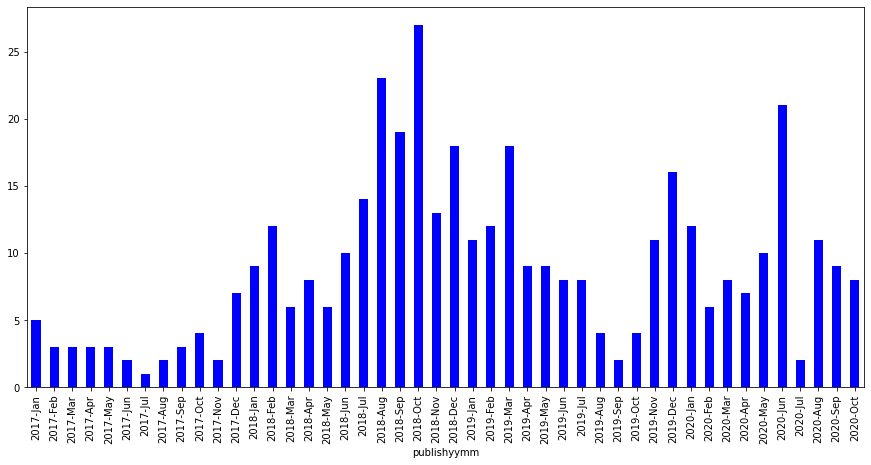

In [189]:
datacamp[datacamp["publishdate"]>='2017-01-01'].sort_values(by="publishdate", ascending=True).groupby([datacamp['publishyymm']],sort=False).size().plot(kind='bar', figsize=(15,7), color='b')

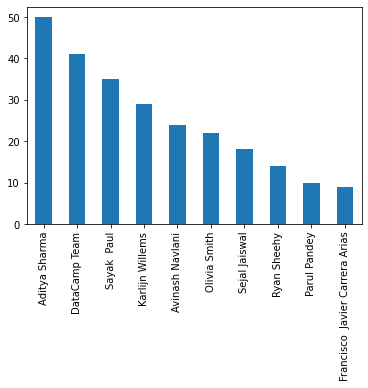

In [190]:
datacamp[datacamp["publishdate"]>='2017-01-01']["author"].value_counts(sort=True, ascending=False)[:10].plot(kind='bar')


In [191]:
topauthors = datacamp[datacamp["publishdate"]>='2017-01-01']["author"].value_counts(sort=True, ascending=False)[:10].index

In [192]:
dh = datacamp[datacamp["publishdate"]>='2017-01-01'].sort_values(by="publishdate", ascending=True).set_index(["publishdate"],drop =False)
dh["publishdateone"] = pd.to_datetime(dh.publishdate.astype(str).str[0:7]+'-01')

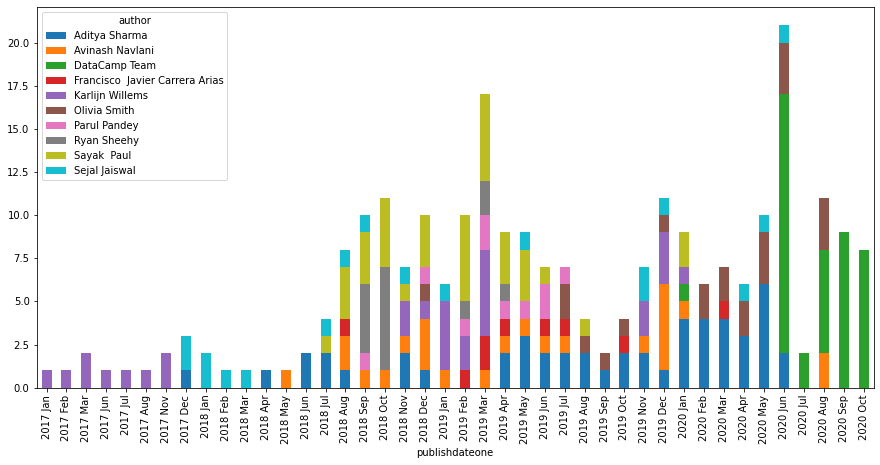

In [193]:
dhp = dh[dh["author"].isin(topauthors)].pivot_table(index="publishdateone",values="posts",columns="author", aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(15,7))
dhp.plot(ax=ax, kind='bar', stacked=True)
ticklabels = [item.strftime('%Y %b') for item in dhp.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

In [194]:
upvotes = dh[dh["author"].isin(topauthors)].groupby(['author'], as_index=False).agg({'posts':"sum",      
                                     'upvote': "sum"})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


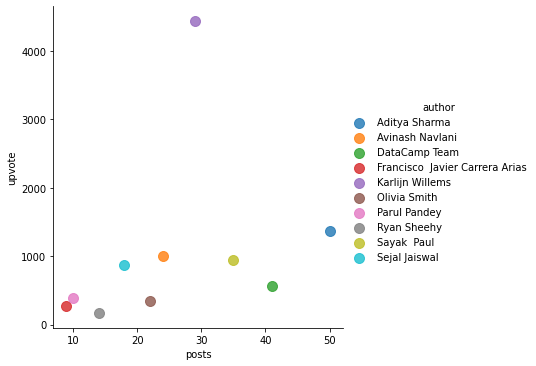

In [195]:
sns.lmplot('posts',
           'upvote',
           data=upvotes,
           fit_reg=False,
           hue="author",
           scatter_kws={"marker": "D",
                        "s": 100})

**THE END**